# Plotting in python for statistics

First we need to import the modules that will help us get the numbers to the screen.

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# The following line is only needed in jupyter notebook (i.e. here), not when doning this from command line.
%matplotlib inline

Let's try a quatdratic function

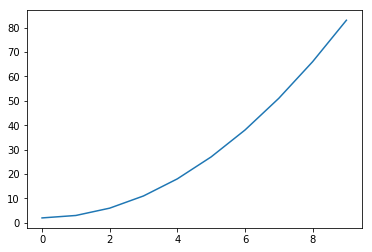

In [2]:
# Create the x-axis data
x = np.arange(10)
# y-axis data is a function of the x-axis data
y = x**2 + 2

plt.figure()    # Create the figure/graph
plt.plot(x, y)  # Plot x vs y
plt.show()      # Tell python to output an image

We can plot multiple lines in the same graph. See how matplotlib automatically scales each axis to the value being plotted.

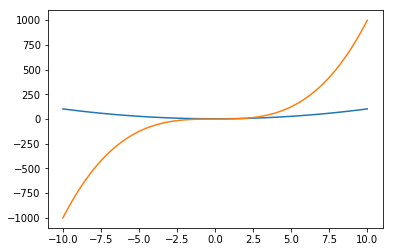

In [3]:
x = np.linspace(-10, 10, 100) # Another way of creating the x-axis, 100 points in the interval [-10, 10]
y1 = x**2 + 2
y2 = x**3 - 1

plt.figure()
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()


We can define a function for each value as $y_i = f(x_i)$. Note that when plotting f(x) as a line, python will not take the steps in the function into account.

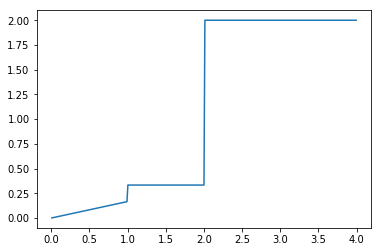

In [4]:
x = np.linspace(-2, 10, 1000)

# Exercise 5.2.1
def f(x):
    if 0 < x <= 1:
        return (1/6)*x
    elif 1 < x <= 2:
        return 1/3
    elif 2 < x <= 4:
        return 2
    else:
        return np.nan
f = np.vectorize(f) # This transforms the function so it is applied for each element of the input data

plt.figure()
plt.plot(x, f(x), '-')
plt.show()


For using a normal distribution, we can import code from scipy for that. Most common statistical functions can be found in scipy.stats, so you do not have to ...

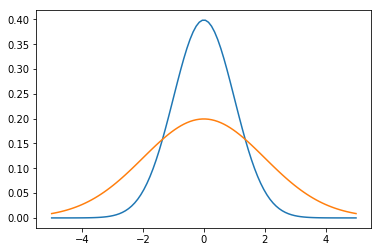

In [5]:
from scipy.stats import norm

x = np.linspace(-5, 5, 100)
y1 = norm(0, 1).pdf(x)
y2 = norm(0, 2).pdf(x)

plt.figure()
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()


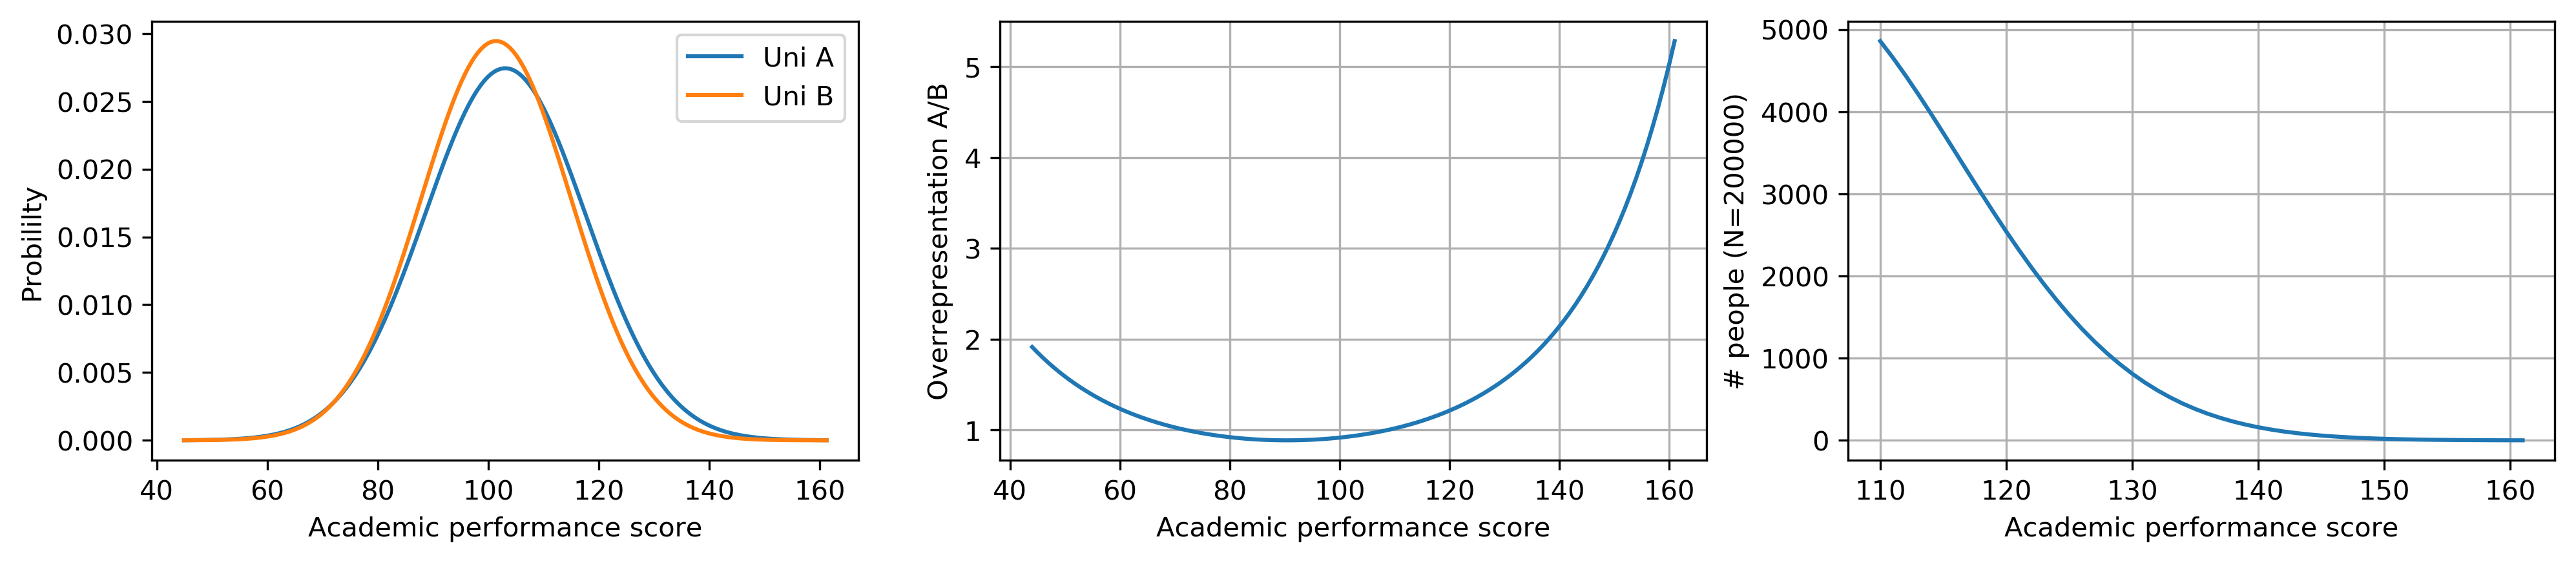

In [40]:
from scipy.stats import norm

#mu_a, sigma_a = 103.08, 14.54
#mu_b, sigma_b = 101.41, 13.55
mu_a, sigma_a = 99, 15
mu_b, sigma_b = 101, 12
Xa = norm(mu_a, sigma_a)
Xb = norm(mu_b, sigma_b)

x = np.linspace(mu_a-4*max(sigma_a, sigma_b), mu_a+4*max(sigma_a, sigma_b), 200)
y_a = Xa.pdf(x)
y_b = Xb.pdf(x)

ap = np.floor(np.arange(mu_a-6*max(sigma_a, sigma_b), mu_a+6*max(sigma_a, sigma_b)))
overrepr_a = (Xa.cdf(ap+.5)-Xa.cdf(ap-.5))/(Xb.cdf(ap+.5)-Xb.cdf(ap-.5))
N = 200000
#popN = N/2*(Xa.cdf(ap+.5)-Xa.cdf(ap-.5)) + N/2*(Xb.cdf(ap+.5)-Xb.cdf(ap-.5))
popN = N/2*Xa.pdf(ap) + N/2*Xb.pdf(ap)

fig = plt.figure(figsize=(16, 3), dpi=300)
ax = fig.subplots(1, 3)

ax[0].plot(x, y_a, label="Uni A")
ax[0].plot(x, y_b, label="Uni B")
ax[0].set_xlabel("Academic performance score")
ax[0].set_ylabel("Probililty")
ax[0].legend()

ax[1].plot(ap[popN>1], overrepr_a[popN>1], label="")
ax[1].set_ylabel("Overrepresentation A/B")
ax[1].set_xlabel("Academic performance score")
ax[1].grid()

ax[2].plot(ap[(popN>1)*(ap>=110)*(overrepr_a>1)],
           popN[(popN>1)*(ap>=110)*(overrepr_a>1)])
ax[2].set_ylabel("# people (N=%i)" % N)
ax[2].set_xlabel("Academic performance score")
ax[2].grid()
plt.show()

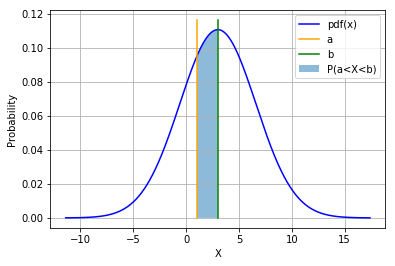

P(X > a)=0.711
P(X < b)=0.500
P(a < X < b)=0.211


In [44]:
from scipy.stats import norm

mu = 3
sigma = 3.6
a = 1
b = 3

assert a<=b, "a must be equal or smaller than b"
distr = norm(mu, sigma)
x = np.linspace(distr.mean()-4*distr.std(), distr.mean()+4*distr.std(), 1000)
y = distr.pdf(x)

plt.figure()
plt.plot(x, y, 'blue', label="pdf(x)")
if a >= np.min(x):
    plt.plot([a, a], [0, np.max(y)*1.05], 'orange', label="a")
if b <= np.max(x):
    plt.plot([b, b], [0, np.max(y)*1.05], 'green', label="b")
fillmask = a<=x
fillmask *= x<=b
plt.fill_between(x[fillmask], y[fillmask], alpha=.5, label="P(a<X<b)")
plt.legend()
plt.ylabel("Probability")
plt.xlabel("X")
plt.grid()
plt.show()

print("P(X > a)=%.3f" % (1 - distr.cdf(a)))
print("P(X < b)=%.3f" % (distr.cdf(b)))
print("P(a < X < b)=%.3f" % (distr.cdf(b) - distr.cdf(a)))

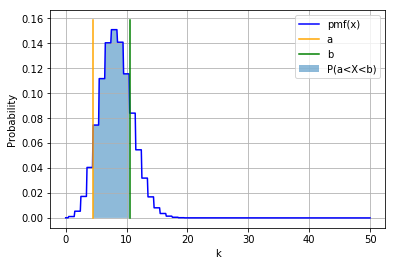

P(X > a)=0.936
P(X < b)=0.799
P(a < X < b)=0.734


In [65]:
from scipy.stats import binom

n = 50
p = 1/6
a = 5
b = 10

assert a<=b, "a must be equal or smaller than b"
assert 0 <= p and p <= 1, "p must be a probability"
distr = binom(n=n, p=p)
k = np.arange(n+1)
x = np.linspace(np.min(k), np.max(k), max(n, 500))
y = distr.pmf(np.round(x))

plt.figure()
plt.plot(x, y, 'b', label="pmf(x)")
if a >= np.min(x):
    plt.plot([a-.5, a-.5], [0, np.max(y)*1.05], 'orange', label="a")
if b <= np.max(x):
    plt.plot([b+.5, b+.5], [0, np.max(y)*1.05], 'green', label="b")
fillmask = (a-.5)<=x
fillmask *= x<=(b+.5)
plt.fill_between(x[fillmask], y[fillmask], alpha=.5, label="P(a<X<b)")
plt.legend()
plt.ylabel("Probability")
plt.xlabel("k")
plt.grid()
plt.show()

print("P(X > a)=%.3f" % np.sum([distr.pmf(k) for k in range(a, n+1)]))
print("P(X < b)=%.3f" % np.sum([distr.pmf(k) for k in range(0, b+1)]))
print("P(a < X < b)=%.3f" % np.sum([distr.pmf(k) for k in range(a, b+1)]))

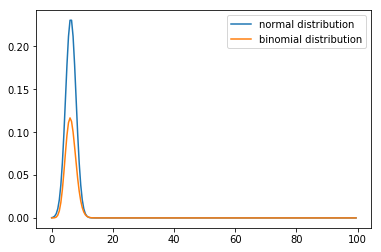

In [7]:
from scipy.stats import binom

N = 200
p = .0625
k = np.arange(N)
x = 100*k/N
y1 = norm(100*p, 100/N*np.sqrt(N*p*(1-p))).pdf(x)
y2 = binom(n=N, p=p).pmf(k)

plt.figure()
plt.plot(x, y1, label="normal distribution")
plt.plot(x, y2, label="binomial distribution")
plt.legend()
plt.show()


The normalization for continous and discrete distributions are different. The integral of a continous PDF should be 1. However, for a PMF, it should sum to 1.  

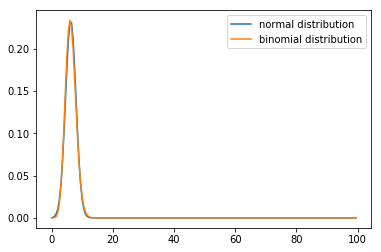

In [8]:
N = 200
p = .0625
k = np.arange(N)
x = 100*k/N
y1 = norm(100*p, 100/N*np.sqrt(N*p*(1-p))).pdf(x)
y2 = binom(n=N, p=p).pmf(k)

y2 /= np.trapz(y2, x) # Normalization

plt.figure()
plt.plot(x, y1, label="normal distribution")
plt.plot(x, y2, label="binomial distribution")
plt.legend()
plt.show()


To get more interesting data, the bead lab data can be imported from csv. Python has a csv module but it is not used here as an example on how to read in data "manually". The number of samples of each study can be calculated as a sum of the different categories ($n(total) = \sum_{colours} n(colour)$).

In [9]:
with open("bead_lab.csv", 'r') as f:
    colours = f.readline()
    colours = [e.strip() for e in colours.split(",")]
    data = dict()
    for c in colours:
        data[c] = list()
    for line in f.readlines():
        for c, n in zip(colours, line.split(",")):
            data[c].append(int(n.strip()))
data["N"] = np.zeros(len(data[colours[0]]), dtype=np.int)
for c in colours:
    data[c] = np.asarray(data[c], dtype=np.int)
    data["N"] += data[c]
data


{'Blue': array([ 2,  9,  1, 20,  8,  0, 18, 13,  6, 10, 20,  6,  5,  6, 17, 26, 10,
         0, 18,  5, 15, 18]),
 'Green': array([ 3, 27,  5, 26, 22,  3, 44, 25, 13, 24, 32,  7, 23, 16, 26, 41, 27,
         1, 34,  4,  4, 33]),
 'N': array([ 20, 177,  10, 240, 141,  32, 317, 188, 106, 190, 380,  48, 129,
        123, 268, 293, 144,  14, 305,  41, 114, 265]),
 'Red': array([ 8, 43,  1, 56, 32, 10, 85, 43, 24, 44, 57,  9, 37, 37, 58, 54, 40,
         6, 87, 10, 33, 66]),
 'White': array([  5,  90,   2, 125,  73,  16, 158,  99,  57, 109, 261,  22,  57,
         54, 159, 157,  58,   6, 149,  20,  60, 135]),
 'Yellow': array([ 2,  8,  1, 13,  6,  3, 12,  8,  6,  3, 10,  4,  7, 10,  8, 15,  9,
         1, 17,  2,  2, 13])}

Estimated distributions from valuing each study equally, even the "my friends say"-study.

Colour	mean	std
White:	0.483	0.101
Red:	0.253	0.071
Blue:	0.068	0.033
Green:	0.140	0.086
Yellow:	0.055	0.024


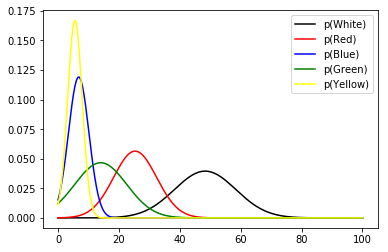

In [10]:
mu = dict()
std = dict()
print("Colour\tmean\tstd")
for c in colours:
    mu[c] = np.mean(data[c]/data["N"])
    std[c] = np.std(data[c]/data["N"])
    print("%s:\t%.3f\t%.3f" % (c, mu[c], std[c]))

x = np.linspace(0, 100, 200)
colours_plt = [c.lower() if c.lower().find("white") < 0 else "k" for c in colours]
plt.figure()
for c, c_plt in zip(colours, colours_plt):
    y = norm(100*mu[c], 100*std[c]).pdf(x)
    plt.plot(x, y, c=c_plt, label="p("+c+")")
plt.legend()
plt.show()

A better way, not always possible in a meta study, is to use all the data as one investigation. The sampling for each categpry separately is now modelled as Bernouli trials using a binomial distribution.

Colour	Probability
White:	0.528
Red:	0.237
Blue:	0.066
Green:	0.124
Yellow:	0.045
N: 3545


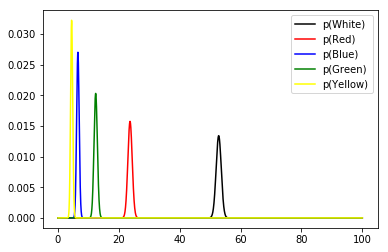

In [11]:
N = np.sum(data["N"])
k = np.arange(N)

print("Colour\tProbability")
p = dict()
for c in colours:
    p[c] = np.sum(data[c])/N
    print("%s:\t%.3f" % (c, p[c]))
print("N: %i" % N)

plt.figure()
x = 100*k/N
for c, c_plt in zip(colours, colours_plt):
    y = binom(n=N, p=p[c]).pmf(k)
    plt.plot(x, y, c=c_plt, label="p("+c+")")
    #plt.plot(100*p[c]*np.ones(2), [0, 0.002], c=c_plt, label="mu "+c)
plt.legend()
plt.show()


We could also value the different studies in proportion to its sample size. Let's say that each study only reported percentages and sample size of their data.

	| Weighted:	| Unweighted:
Colour:	| Mean:	Std:	| Mean:	Std:
White	| 0.528	0.086	| 0.483	0.101
Red	| 0.237	0.050	| 0.253	0.071
Blue	| 0.066	0.021	| 0.068	0.033
Green	| 0.124	0.040	| 0.140	0.086
Yellow	| 0.045	0.020	| 0.055	0.024


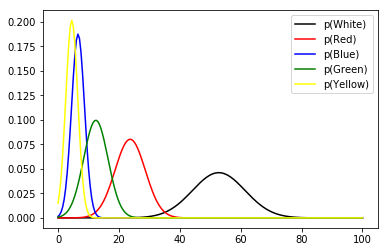

In [12]:
w = data["N"]/np.sum(data["N"])

print("\t| Weighted:\t| Unweighted:")
print("Colour:\t| Mean:\tStd:\t| Mean:\tStd:")
mu_w = dict()
std_w = dict()
for c in colours:
    mu_w[c] = np.sum((data[c]/data["N"])*w)
    std_w[c] = np.sqrt(np.sum(w*((data[c]/data["N"]-mu[c])**2)))
    print("%s\t| %.3f\t%.3f\t| %.3f\t%.3f" % (c, mu_w[c], std_w[c], mu[c], std[c]))

x = np.linspace(0, 100, 200)
plt.figure()
for c, c_plt in zip(colours, colours_plt):
    y = norm(100*mu_w[c], 100*std_w[c]).pdf(x)
    plt.plot(x, y, c=c_plt, label="p("+c+")")
plt.legend()
plt.show()


What if we model the variance from a binomial distribution instead of as a normal distribution from 
the relative frequencies of each study.

In [13]:
print("\t| Weighted:\t| Unweighted:")
print("Colour:\t| Mean:\tStd:\t| Mean:\tStd:")
mu_w = dict()
std_w = dict()
for c in colours:
    p = data[c]/data["N"]
    mu_w[c] = np.sum(p*w)
    std_w[c] = np.sum(w*(p*(1-p)))
    print("%s\t| %.3f\t%.3f\t| %.3f\t%.3f" % (c, mu_w[c], std_w[c], mu[c], std[c]))

	| Weighted:	| Unweighted:
Colour:	| Mean:	Std:	| Mean:	Std:
White	| 0.528	0.244	| 0.483	0.101
Red	| 0.237	0.179	| 0.253	0.071
Blue	| 0.066	0.061	| 0.068	0.033
Green	| 0.124	0.107	| 0.140	0.086
Yellow	| 0.045	0.043	| 0.055	0.024


/home/fredrik/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


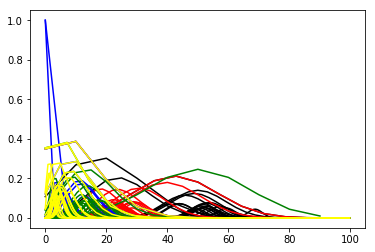

In [14]:
plt.figure()
for c, c_plt in zip(colours, colours_plt):
    p = data[c]/data["N"]
    for i in range(len(data["N"])):
        N = data["N"][i]
        k = np.arange(N)
        x = 100*k/N
        y = binom(n=N, p=p[i]).pmf(k)
        enougth_samples = 9*(1-p)/p < data["N"]
        plt.plot(x, y, c=c_plt, label="p("+c+")"+str(i))
    #plt.plot(100*p[c]*np.ones(2), [0, 0.002], c=c_plt, label="mu "+c)
#plt.legend()
plt.show()

In [15]:
for c in colours:
    var = [n*p*(1-p) for p, n in zip(data[c]/data["N"], data["N"])]
    print(c, np.sqrt(var[:5]))
b = binom(n=data["N"][1], p=data[c][1]/data["N"][1])
np.sqrt(b.var())/data["N"][1]

White [1.93649167 6.6511118  1.26491106 7.73923984 5.93343693]
Red [2.19089023 5.70558256 0.9486833  6.55235327 4.97368964]
Blue [1.34164079 2.9227338  0.9486833  4.28174419 2.74701643]
Green [1.59687194 4.78344603 1.58113883 4.81490741 4.3089878 ]
Yellow [1.34164079 2.76376882 0.9486833  3.50654151 2.39680639]


0.015614513095786531

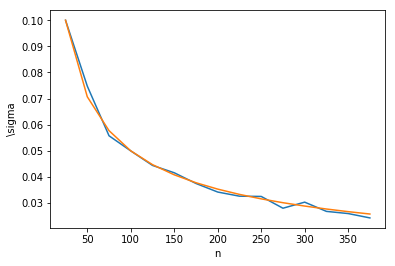

In [121]:
import numpy as np

n_simulations = 250
p = .5

population = np.zeros(16000)
population[:int(len(population)*p)] = 1
N = np.arange(25, 400, 25)
var_analytical = np.zeros(N.shape)
var_simulated = np.zeros(N.shape)
for i, n in enumerate(N):
    var_analytical[i] = np.sqrt(n*p*(1-p))/n
    v = np.zeros(n_simulations)
    for j in range(n_simulations):
        v[j] = np.sum(np.random.choice(population, size=n, replace=False))/n
    var_simulated[i] = np.std(v)

plt.figure()
plt.plot(N, var_simulated)
plt.plot(N, var_analytical)
plt.xlabel("n")
plt.ylabel("\sigma")
plt.show()


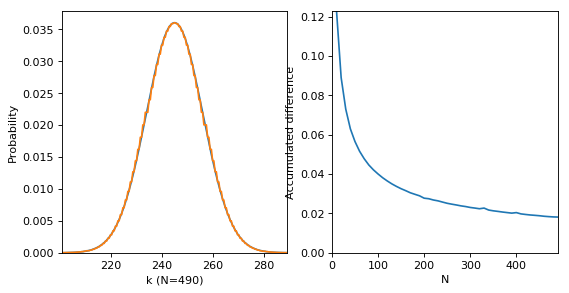

In [70]:
import matplotlib.pylab as plt
import numpy as np
import time
from scipy.stats import binom, norm
from IPython import display

fps = 20
N = 50
p = .5

N = range(10, 500, 10)
diff = list()
diff_n = list()

# Set up the plotting
fig = plt.figure(figsize=(8, 4), dpi=80)
#fig.tight_layout()
ax = fig.subplots(1, 2)
p1 = ax[0].plot(0, 0, label="normal aproximation")
p2 = ax[0].plot(0, 0, label="binomial distribution")
ax[0].set_ylabel("Probability")
p3 = ax[1].plot(0, 0)
ax[1].set_xlabel("N")
ax[1].set_ylabel("Accumulated difference")

for n in N:
    t = time.time()
    try:
        display.display(plt.gcf())
        display.clear_output(wait=True)
    
        k = np.round(np.linspace(1, n, 1000))
        x = np.linspace(np.min(k), np.max(k), 1000)
        normal = norm(n*p, np.sqrt(n*p*(1-p)))
        y1 = normal.pdf(x)
        y2 = binom(n=n, p=p).pmf(k)
        
        p1[0].set_data(x, y1)
        p2[0].set_data(x, y2)
        ax[0].axis((max(0, normal.mean()-normal.std()*4),
                    min(normal.mean()+normal.std()*4, np.max(N)),
                    0, normal.pdf(normal.mean())*1.05))
        ax[0].set_xlabel("k (N=%i)" % n)

        diff.append(np.trapz(np.abs(y2-y1), x))
        diff_n.append(n)
        p3[0].set_data(diff_n, diff)
        ax[1].axis((1, np.max(N), 0, np.max(diff)))

        time.sleep(max(0, t+1/fps-time.time()))
    except KeyboardInterrupt:
        break